<a href="https://colab.research.google.com/github/e19166/e19-4yp-Dynamic-Multi-Dimensional-Resource-Orchestration-in-Kubernetes/blob/main/results/hashgen_cpu_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('hashgen_cpu_limit_reduction.csv')
df.head()  # to preview the data

,Timestamp,Service,CPU Request,Memory Request,CPU Limit,Memory Limit,Latency,CPU Usage,Memory Usage
0,2025-05-10T09:07:17.197000,hash-gen-deployment,0.1,134217728,0.2,268435456,0.000532,0.003339,168300544
1,2025-05-10T09:07:47.274000,hash-gen-deployment,0.1,134217728,0.2,268435456,0.000531,0.003318,168284160
2,2025-05-10T09:08:17.351000,hash-gen-deployment,0.1,134217728,0.2,268435456,0.000531,0.003318,168284160
3,2025-05-10T09:08:47.426000,hash-gen-deployment,0.1,134217728,0.2,268435456,0.000531,0.003310,168284160
4,2025-05-10T09:09:17.505000,hash-gen-deployment,0.1,134217728,0.2,268435456,0.000531,0.003310,168284160


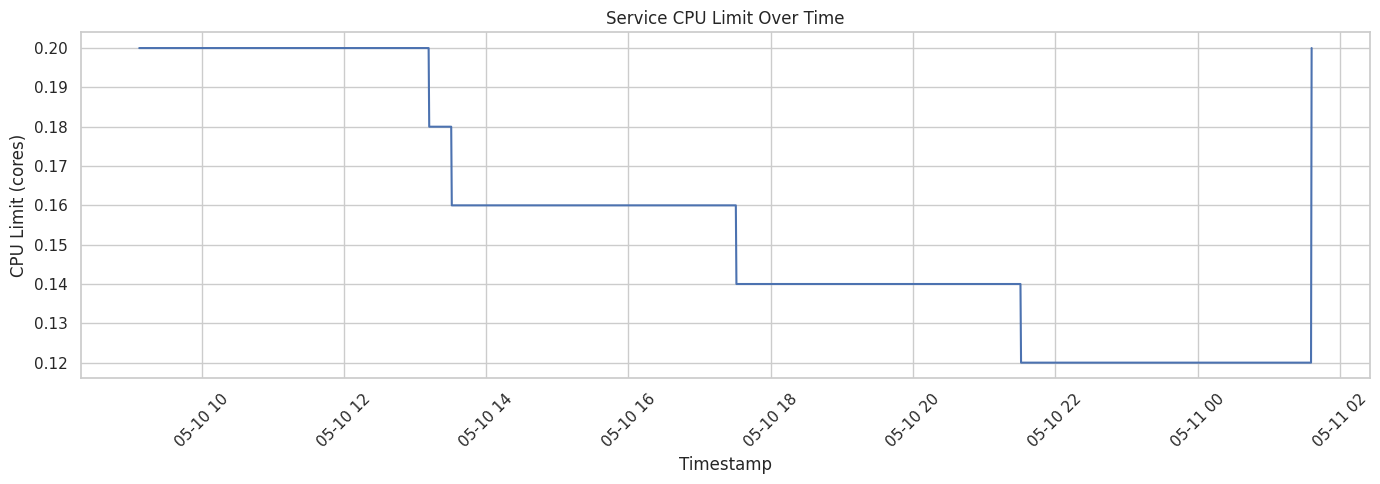

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')


# Set visual style
sns.set(style="whitegrid")

# Plotting functions
def plot_time_series(x, y, ylabel, title):
  plt.figure(figsize=(14, 5))
  sns.lineplot(x=x, y=y)
  plt.ylabel(ylabel)
  plt.xlabel("Timestamp")
  plt.title(title)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# 1. Latency over time
plot_time_series(df['Timestamp'], df['CPU Limit'], 'CPU Limit (cores)', 'Service CPU Limit Over Time')

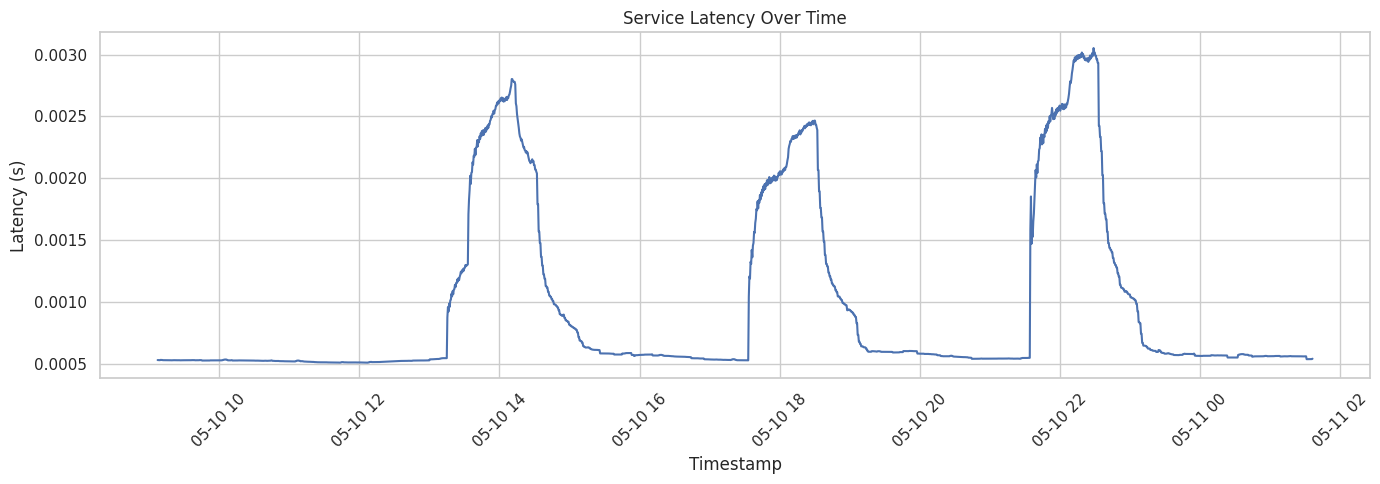

In [3]:
# 1. Latency over time
plot_time_series(df['Timestamp'], df['Latency'], 'Latency (s)', 'Service Latency Over Time')